In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.ExcelFile('/content/drive/My Drive/Dados2/rmp-diesel-2011-2021.xlsx')

In [4]:
pd.set_option('display.max_rows', 10)

In [5]:
rail = pd.read_excel(data)

In [6]:
rail

,ANO,TKU
0,2011,1025742085
1,2012,1354131084
2,2013,1254507665
3,2014,1255090874
4,2015,972508791
...,...,...
6,2017,221137915
7,2018,166363736
8,2019,147612635
9,2020,86897520


In [7]:
data2 = pd.ExcelFile('/content/drive/My Drive/Dados2/rct-pis-2011-2021.xlsx')
rail2= pd.read_excel(data2)

In [8]:
ANL_ICMS = pd.concat([rail,rail2], axis=1)

In [9]:
ANL_ICMS

,ANO,TKU,Ano-calendário,Descrição,Receita_Tributaria
0,2011,1025742085,2011,Contribuição para o PIS/Pasep,42902.39592
1,2012,1354131084,2012,Contribuição para o PIS/Pasep,46486.15108
2,2013,1254507665,2013,Contribuição para o PIS/Pasep,50519.56180
3,2014,1255090874,2014,Contribuição para o PIS/Pasep,51441.21704
4,2015,972508791,2015,Contribuição para o PIS/Pasep,52589.86044
...,...,...,...,...,...
6,2017,221137915,2017,Contribuição para o PIS/Pasep,60775.33690
7,2018,166363736,2018,Contribuição para o PIS/Pasep,66526.77593
8,2019,147612635,2019,Contribuição para o PIS/Pasep,64016.41539
9,2020,86897520,2020,Contribuição para o PIS/Pasep,61312.37895


In [ ]:
ANL_ICMS.to_excel('/content/drive/My Drive/Dados2/ANL_ICMS.xlsx')

In [10]:
ANL_ICMS.corr(method= 'pearson')

<ipython-input-10-1ecd01f87daf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ANL_ICMS.corr(method= 'pearson')


,ANO,TKU,Ano-calendário,Receita_Tributaria
ANO,1.000000,-0.908327,1.000000,0.948997
TKU,-0.908327,1.000000,-0.908327,-0.859000
Ano-calendário,1.000000,-0.908327,1.000000,0.948997
Receita_Tributaria,0.948997,-0.859000,0.948997,1.000000


In [11]:
y = ANL_ICMS['TKU']
xn = ANL_ICMS['Receita_Tributaria']
x = sm.add_constant(xn)

In [12]:
regression = sm.OLS(y,x)
results = regression.fit()

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    TKU   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     25.34
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           0.000706
Time:                        16:44:01   Log-Likelihood:                -228.69
No. Observations:                  11   AIC:                             461.4
Df Residuals:                       9   BIC:                             462.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.391e+09   5.54

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'TKU')

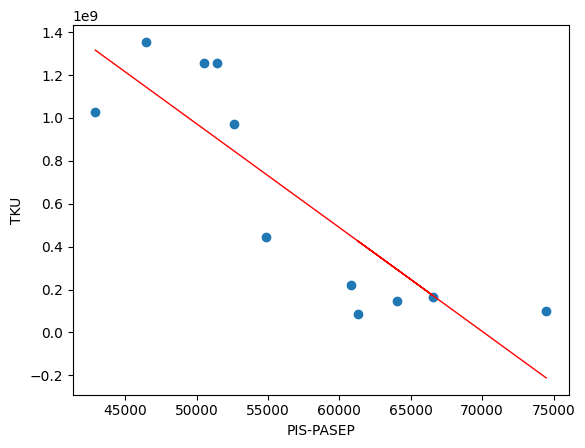

In [14]:
plt.scatter(xn,y)
yhat = -4.837e+04*xn + 3.391e+09
fig = plt.plot(xn, yhat, lw=1, c= 'red', label= 'regression line')
plt.xlabel ('PIS-PASEP', fontsize=10)
plt.ylabel('TKU', fontsize=10)